In [1]:
pip install financepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from financepy.utils import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.260 - This build:  22 Nov 2022 at 13:42 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# a/ CEV Model using Monte Carlo to Price a Call

- The CEV or constant elasticity of variance model is a stochastic volatility model.
- Here it is under the form : dS/S = (r-q)dt + sigma * S^β*dWt.
- When β = 0, we are under Black-Scholes Model, with a stock price following a lognormal process.

In [3]:
#Let's compute Stock Price, and plot it against time T, using CEV Model
def montecarlocev (S0, K,T, r, q, sigma, beta, n_steps):
    payoff = 0
    dt = 1/n_steps 
    S = np.zeros(n_steps*T)
    S[0] = S0
    t = np.zeros(n_steps*T)
    for i in range (1,(n_steps*T)):
        Z = np.random.normal(loc=0.0, scale=1.0, size=1)
        S[i]=S[i-1]*(1+(r-q)*dt+sigma*((S[i-1]/S0)**beta)*Z*np.sqrt(dt))
        t[i]=i*dt
        Payoff = max(S[-1]-K,0)
    montecarlocev.result = {"Terminal Stock Price is": S[-1],"Payoff is" : Payoff}
    # In Monte carlo Method, we transform dS/S in a discrete time form : (S(t+1)-S(t))/St)
    plt.xlabel("Time(T)")
    plt.ylabel("S(T)")
    plt.plot(t,S)
    return montecarlocev.result

{'Terminal Stock Price is': 86.75834384198785, 'Payoff is': 0}

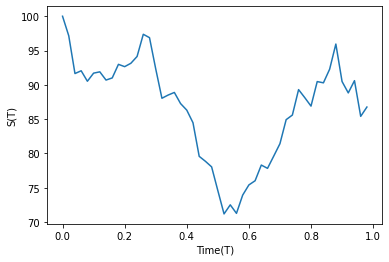

In [4]:
# when Beta = 0
montecarlocev(100,100,1,0.05,0,0.20,0,50)

{'Terminal Stock Price is': 322.4467482266292, 'Payoff is': 222.4467482266292}

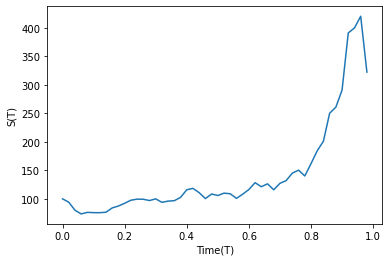

In [5]:
#with Beta different than 0
montecarlocev(100,100,1,0.05,0,-0.5,1,50)   #Beta equal to -0.5. 

In [6]:
def prixcall (S0, K, T, r, q, sigma, beta, n_steps,Npaths):
    payoff = []
    for i in range (0,Npaths):
        montecarlocev(S0, K, T, r, q, sigma, beta, n_steps)
        payoff.append( montecarlocev.result.get("Payoff is"))
    prix = np.exp(-r*T)*sum(payoff)*1/Npaths
    return prix

10.506452964719942


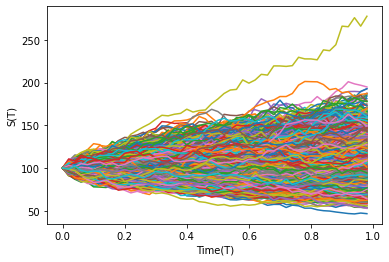

In [7]:
prixbeta0 = prixcall(100, 100, 1, 0.05, 0, 0.20, 0, 50,5000)   #Beta = 0, 50 steps and 1000 paths
print(prixbeta0)

10.221324246256714


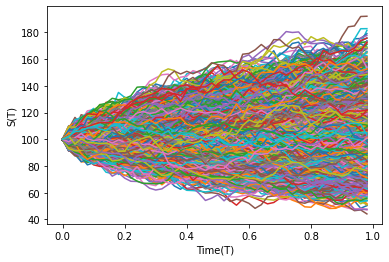

In [8]:
prixbeta1 = prixcall(100, 100, 1, 0.05, 0, 0.20, -0.5, 50,5000) #Beta equal to -0.5, 50 steps and 1000 paths
print(prixbeta1)

# b/ CEV Model to Price a Call with different Values of Beta & different Strikes, a  DataFrame presenting all the prices is displayed at the end of this part

[24.90643393145884, 20.621684990005754, 17.090784171084877, 13.606812375857876, 10.538498722182206, 8.223853724186041, 5.950711964476003, 4.211005892897335, 2.705320313977132]


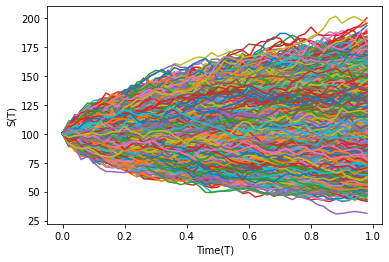

In [9]:
B=[]
for i in range (80,121,5):
    B.append(prixcall(100, i, 1, 0.05, 0, 0.20, -0.5, 50,5000)) # Beta equal to -0.5, K varying from 80 to 120
print(B)

[24.288742313391545, 20.519110499605986, 16.599907775460412, 13.452594417805317, 10.159001058671231, 7.448591966059713, 5.750533456520157, 4.246948570328853, 2.8433290090408594]


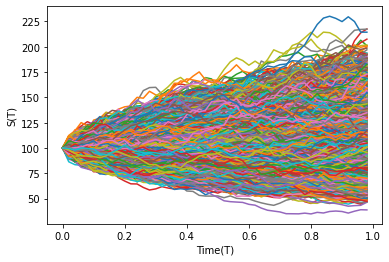

In [10]:
A0=[]
for i in range (80,121,5):
    A0.append(prixcall(100, i, 1, 0.05, 0, 0.20, -0.25, 50,5000)) # Beta equal to -0.25
print(A0)

[24.317362425334206, 20.803381909535098, 16.34599721246204, 13.238064276654974, 10.08369988510129, 7.904794437490541, 5.9826179910034, 4.554980217461069, 3.2333644483489126]


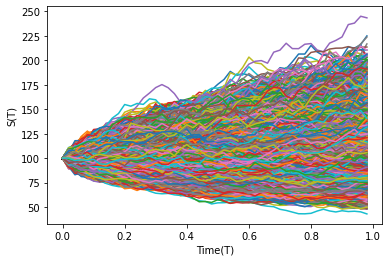

In [11]:
L0=[]
for i in range (80,121,5):                                        # Beta equal to 0.0
    L0.append(prixcall(100, i, 1, 0.05, 0, 0.20, 0.00, 50,5000))  
print(L0)

[24.566112682434536, 20.321293232669184, 16.35421085248596, 13.155775979816978, 10.50109377486186, 7.918047829670712, 5.897601861813033, 4.42890802454552, 3.461209800194898]


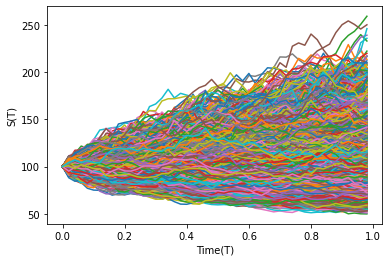

In [12]:
L=[]
for i in range (80,121,5):                                        # Beta equal to 0.25
    L.append(prixcall(100, i, 1, 0.05, 0, 0.20, 0.25, 50,5000))
print(L)

[24.430708694406654, 20.61487172790314, 16.212525901874578, 13.051272498797722, 10.432368868264428, 8.248266819166048, 5.990039827152835, 4.6094355209511235, 3.3612587728283723]


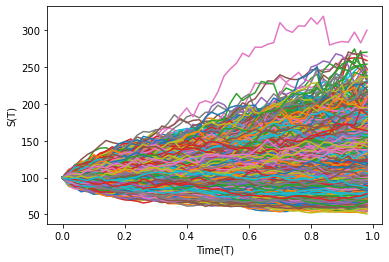

In [13]:
C=[]
for i in range (80,121,5):                                        # Beta equal to 0.50
    C.append(prixcall(100, i, 1, 0.05, 0, 0.20, 0.50, 50,5000))
print(C)

In [14]:
import pandas as pd
df=pd.DataFrame(B,columns=["-0.5"],index=["80","85","90","95","100","105","110","115","120"])
df["-0.25"]=A0
df["0.0"]=L0
df["0.25"]=L
df["0.5"]=C
df

,-0.5,-0.25,0.0,0.25,0.5
80,24.906434,24.288742,24.317362,24.566113,24.430709
85,20.621685,20.519110,20.803382,20.321293,20.614872
90,17.090784,16.599908,16.345997,16.354211,16.212526
95,13.606812,13.452594,13.238064,13.155776,13.051272
100,10.538499,10.159001,10.083700,10.501094,10.432369
105,8.223854,7.448592,7.904794,7.918048,8.248267
110,5.950712,5.750533,5.982618,5.897602,5.990040
115,4.211006,4.246949,4.554980,4.428908,4.609436
120,2.705320,2.843329,3.233364,3.461210,3.361259


In [15]:
len(df)

9

In [16]:
df.iloc[1][0]

20.621684990005754

# c/ Prices to ImpliedVolatility using FinancePy, and Skew as a function of the option moneyness for each of the values of β representation

In [17]:
iVol = pd.DataFrame(columns=df.columns,index=df.index)
valuation_date = Date(17, 12, 2022)
expiry_date = valuation_date.add_years(1.0)
stock_price = 100
interest_rate = 0.05
dividend_yield = 0.0
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)
for a in range (0,len(df.columns)):
    for b in range (0,len(df)):
        call_option = EquityVanillaOption(expiry_date, int(df.index[b]), OptionTypes.EUROPEAN_CALL)
        sigma = call_option.implied_volatility(valuation_date, stock_price, discount_curve, dividend_curve, df.iloc[b][a])
        iVol.iloc[b,a]= sigma
print(iVol)

         -0.5     -0.25       0.0      0.25       0.5
80   0.221292  0.174928   0.17767  0.198319  0.187675
85   0.207361  0.202439  0.215797  0.192549  0.207038
90   0.214127  0.196315  0.186711  0.187026  0.181526
95   0.207807  0.203191  0.196727  0.194234  0.191055
100  0.202342  0.192221  0.190209  0.201346  0.199515
105  0.205105  0.185567  0.197062  0.197396  0.205721
110  0.197741  0.192678  0.198548  0.196399  0.198735
115  0.193169  0.194132  0.202352  0.198996  0.203798
120  0.183786  0.187976  0.199586  0.206232  0.203327


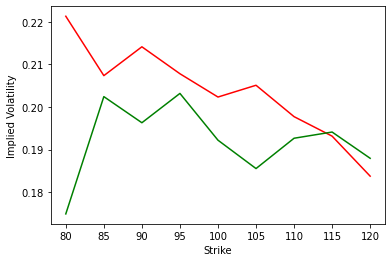

In [18]:
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.plot((iVol.index),iVol["-0.5"],"r")
plt.plot((iVol.index),iVol["-0.25"],"g")

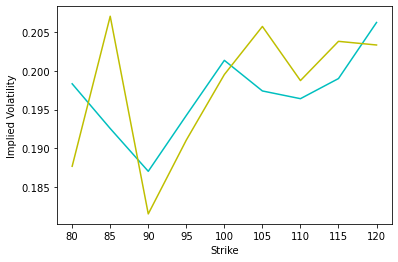

In [19]:
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.plot((iVol.index),iVol["0.25"],"c")
plt.plot((iVol.index),iVol["0.5"],"y")
plt.show()

Discussions :

- Black Scholes model says that the volatility is constraint when he sets its model assumptions. 
- Black Scholes model says that the implied volatility of an option strike (K1) is the same as an option strike (K2) if K1 is different than K1<K2.
- And Put Call Parity implies that Volatility (OTM Put) = Volatility (ITM CALL)
- Here we prove that when the implied volatility si varying as a function of the moneyness K/S => Skew
- Skew implies that OTM Puts are more expensive than OTM Calls.

Interpretation :

- Investor prefer to hedge themself instead that investing when the market is going down.

Let's Remember that : 

- The CEV or constant elasticity of variance model is a stochastic volatility model.
- Here it is under the form : dS/S = (r-q)dt + sigma * S^β*dWt.
- When β = 0, we are under Black Scholes Model, with a stock price following a lognormal process.
- Black Scholes Volatility is then equal to : Volatility = CEV sigma * S^β

Deduction :

- If β<0, the volatility decreases when the Stock Price increases.
- If β>0, the volatility increases when the Stock Price increases.
- And, we can see that this is true by looking at our graphics.

Analysis :

- When β<0, the volatility decreases when the Stock Price increase => This gives us a skew found is the Equity Markets
- Conversely, in commodity markets, we often observe the second case when the volatility increases with the increasing of our Stock Price.



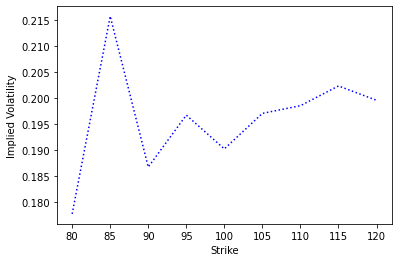

In [20]:
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.plot((iVol.index),iVol["0.0"],"b", linestyle=":")

# d/ Delta CEV vs Delta Black-Scholes

Delta of an option is the variation of the price of the option, in function of the variation of the stock price, here we compute it for S = 100 and S+1 = 101

K= 80 Beta = -0.5 DeltaCEV =  1.0936570478266958
K= 80 Beta = -0.25 DeltaCEV =  1.2201535631887666
K= 80 Beta = 0.0 DeltaCEV =  0.86303777295673
K= 80 Beta = 0.25 DeltaCEV =  0.9580412732320234
K= 80 Beta = 0.5 DeltaCEV =  0.6946924350445585
K= 85 Beta = -0.5 DeltaCEV =  1.1505166013620993
K= 85 Beta = -0.25 DeltaCEV =  0.7464076455833073
K= 85 Beta = 0.0 DeltaCEV =  0.9011314404826258
K= 85 Beta = 0.25 DeltaCEV =  0.9109308457074654
K= 85 Beta = 0.5 DeltaCEV =  1.3126362478585776
K= 90 Beta = -0.5 DeltaCEV =  0.8316344820775292
K= 90 Beta = -0.25 DeltaCEV =  1.5530047967296774
K= 90 Beta = 0.0 DeltaCEV =  1.3605106536271165
K= 90 Beta = 0.25 DeltaCEV =  0.7105173607351034
K= 90 Beta = 0.5 DeltaCEV =  0.9057315288938987
K= 95 Beta = -0.5 DeltaCEV =  0.008584718122929047
K= 95 Beta = -0.25 DeltaCEV =  1.2126216333445772
K= 95 Beta = 0.0 DeltaCEV =  0.5548245894725206
K= 95 Beta = 0.25 DeltaCEV =  0.7843954017674921
K= 95 Beta = 0.5 DeltaCEV =  0.9515564763846829
K= 100 Beta = -0.5 Delta

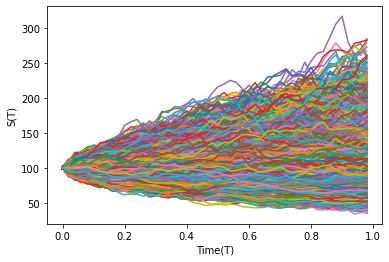

In [32]:
for i in range (80,125,5):
    for j in np.arange(-0.5,0.75,0.25):
        Delta = (prixcall(101, i, 1, 0.05, 0, 0.20, j, 50,5000) - prixcall(100, i, 1, 0.05, 0, 0.20, j, 50,5000))
        print("K=",i, "Beta =", j, "DeltaCEV = ",Delta)


Let's compute Black-Scholes Delta

In [36]:
from scipy.stats import norm
for i in range (80,125,5):
    
    # we compute d1
    d1=((np.log(100/i) + (0.05 + 0.2*0.2/2)*1)/(0.2))
    #we compute N(d1)
    Nd1 = norm.cdf(d1)
    print ("K =",i, "Delta B&S = ", Nd1)
    


K = 80 Delta B&S =  0.9286374026649281
K = 85 Delta B&S =  0.8775029982658564
K = 90 Delta B&S =  0.8097030607754923
K = 95 Delta B&S =  0.7278974800590385
K = 100 Delta B&S =  0.6368306511756191
K = 105 Delta B&S =  0.5422283335848053
K = 110 Delta B&S =  0.44964793063717595
K = 115 Delta B&S =  0.36361608589662114
K = 120 Delta B&S =  0.28719163790512714


Discussions :

- B&S implies that the volatility is constant
- But in reality the implied volatility and the price of the stock are negatively correlated

- The Delta is a very important greek because analyzes the impact of the variation of the stock on the price of the option. Hence it should take in account the variation of the stock and the impact of the variation of the stock on volatility which impacts the option price because it is lied to the vega : the impact of the volatility on the price option. Let's remember that the vega of a call is always positive, and maximal at the money. Hence, if vega is positive, we are long volatility when we are long a call, because if the volatility increases, the price will increases because vega is positive.

- In conclusion Delta Skew = Delta BS + Vega*Skew. This equality explains our Prices and why Delta CEV than Delta BS
